### Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy.matlib
from mpl_toolkits.mplot3d import Axes3D

from utils_tp1 import *
from fonctions_tp1_interpolation import *

### Variables Globales

In [11]:
## Points  de contrôle initiaux 
nb_pts_controle = 5
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)
borne_min = min(X_pts_controles); borne_max = max(X_pts_controles)

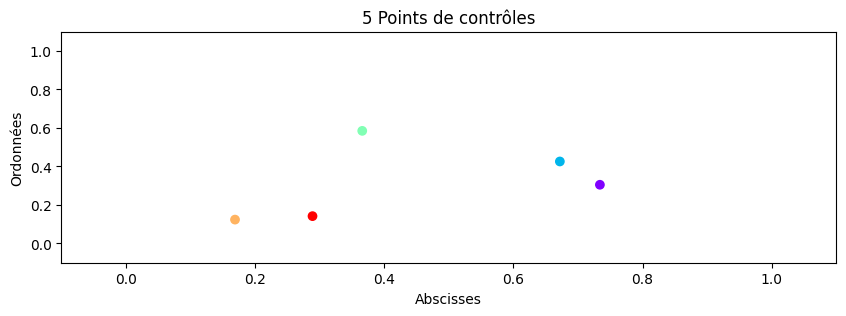

In [12]:
### Affichage
plt.figure(figsize=(10, 3))
plt.xlabel('Abscisses'); plt.ylabel('Ordonnées')
plt.xlim([-epsilon,1+epsilon]); plt.ylim([-epsilon,1+epsilon])
plt.title(str(nb_pts_controle)+ ' Points de contrôles')
plt.scatter(X_pts_controles,Y_pts_controles, c=cm.rainbow(np.linspace(0, 1, len(X_pts_controles))))
plt.show()

# INTERPOLATION

## Cas fonctionnel (*y = f(x)*) : Lagrange

$$\mathcal{L}_i = \prod_{j = 0, j \neq i} \frac{X - X_i}{X_j - X_i}$$

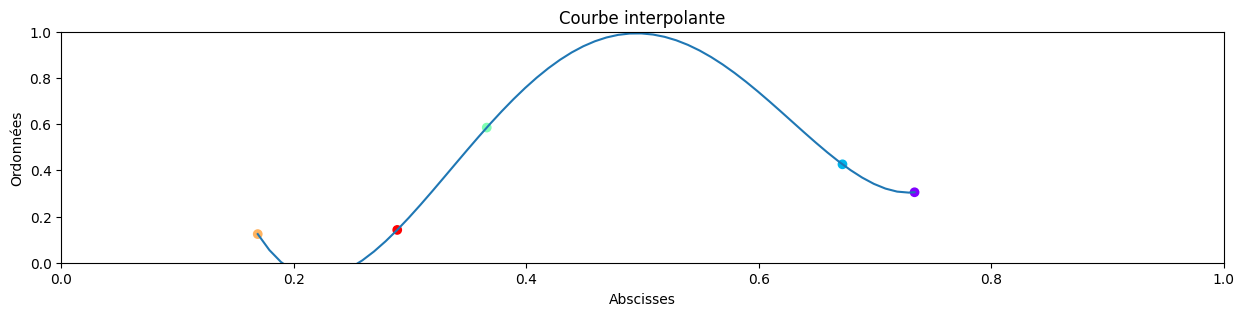

In [13]:
### Interpolation 
# Abscisses des points de la courbe en construction 
x_fonc = get_x_fonc(borne_min, borne_max)
y_fonc = []
for i in range(0, len(x_fonc)):
    y_fonc.append(lagrange(X_pts_controles, Y_pts_controles, x_fonc[i]))

### Affichage
plt.figure(figsize=(15, 3))
plt.xlabel('Abscisses'); plt.ylabel('Ordonnées'); plt.title('Courbe interpolante')
plt.xlim([0,1]); plt.ylim([0,1])
plt.scatter(X_pts_controles,Y_pts_controles, c=cm.rainbow(np.linspace(0, 1, len(Y_pts_controles))))
plt.plot(x_fonc,y_fonc)
plt.show()


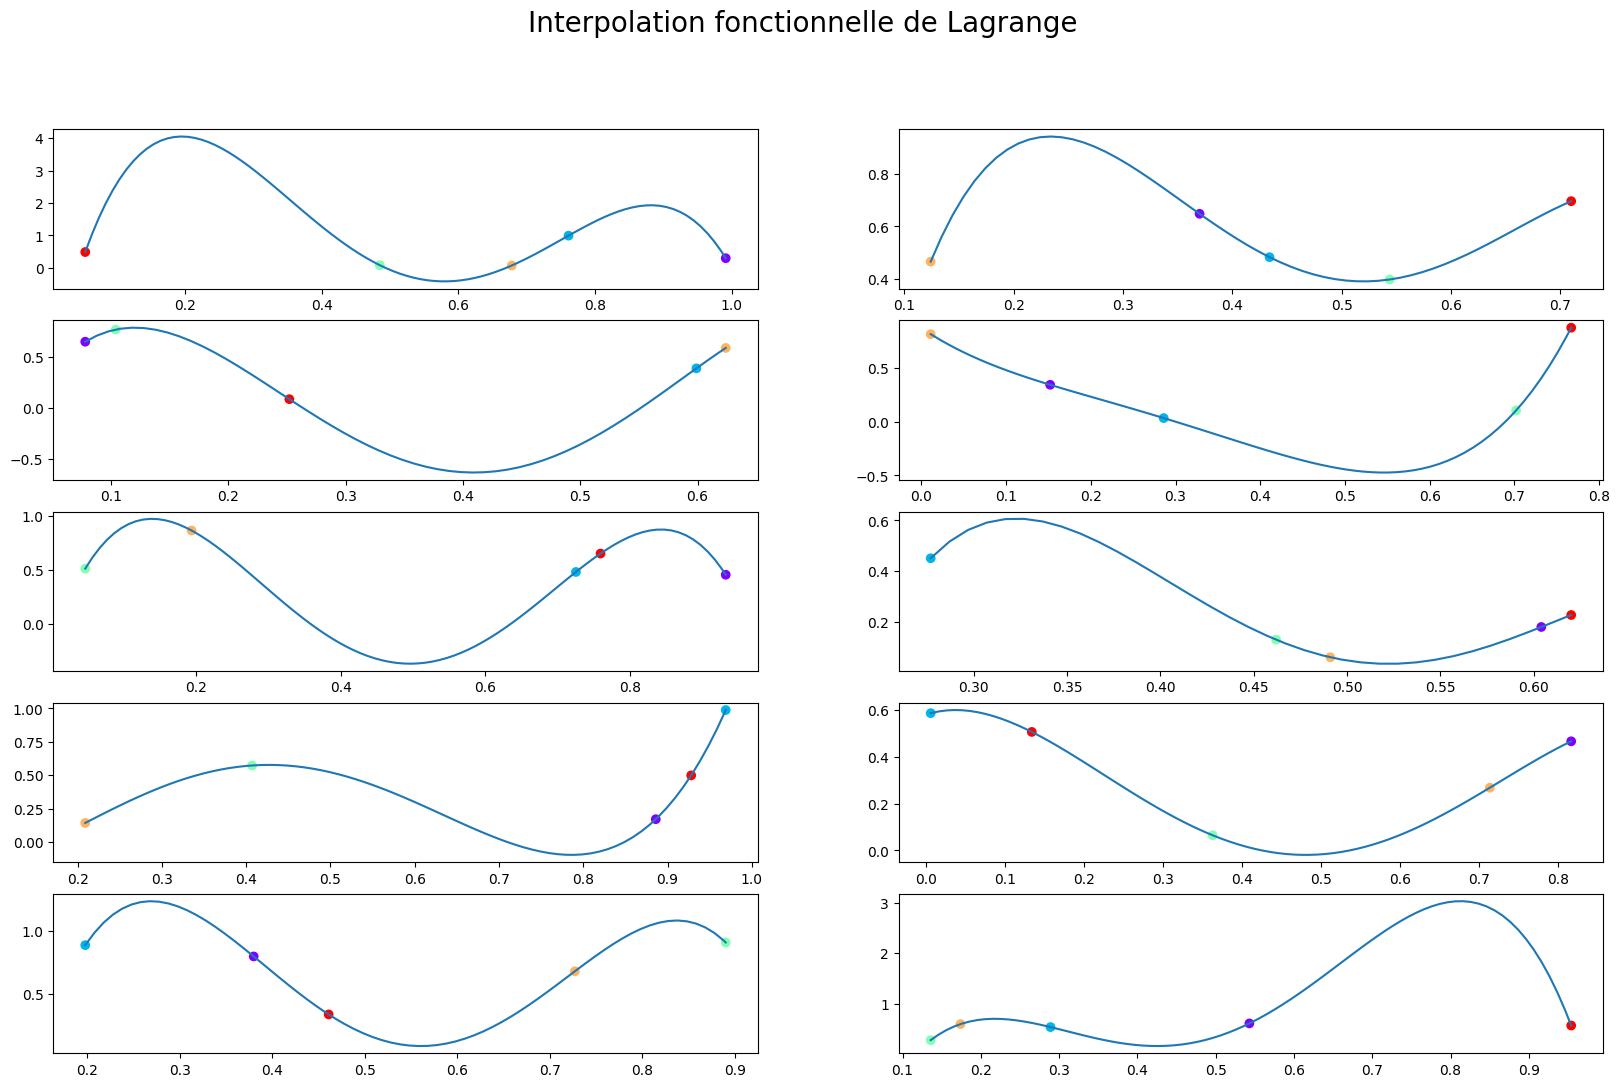

In [14]:
### Affichage n°2
multiple_affichage_lagrange(nb_pts_controle)

**REMARQUE** 

Avez-vous remarqué l'intervalle des valeurs de vos courbes ? 

Initiallement, vos points de contrôles ont une ordonnée entre 0 et 1.

**QUESTION** :

Quelle configuration des points de contrôles pose problème dans le cas fonctionnel ?

Proposez deux jeux de 5 points de contrôles illustrant ce problème : avec et sans problème.


**REPONSE** : 2 pts avec la même abscisse --> divise par 0 Dans lagrange ---> Courbe à l'infini

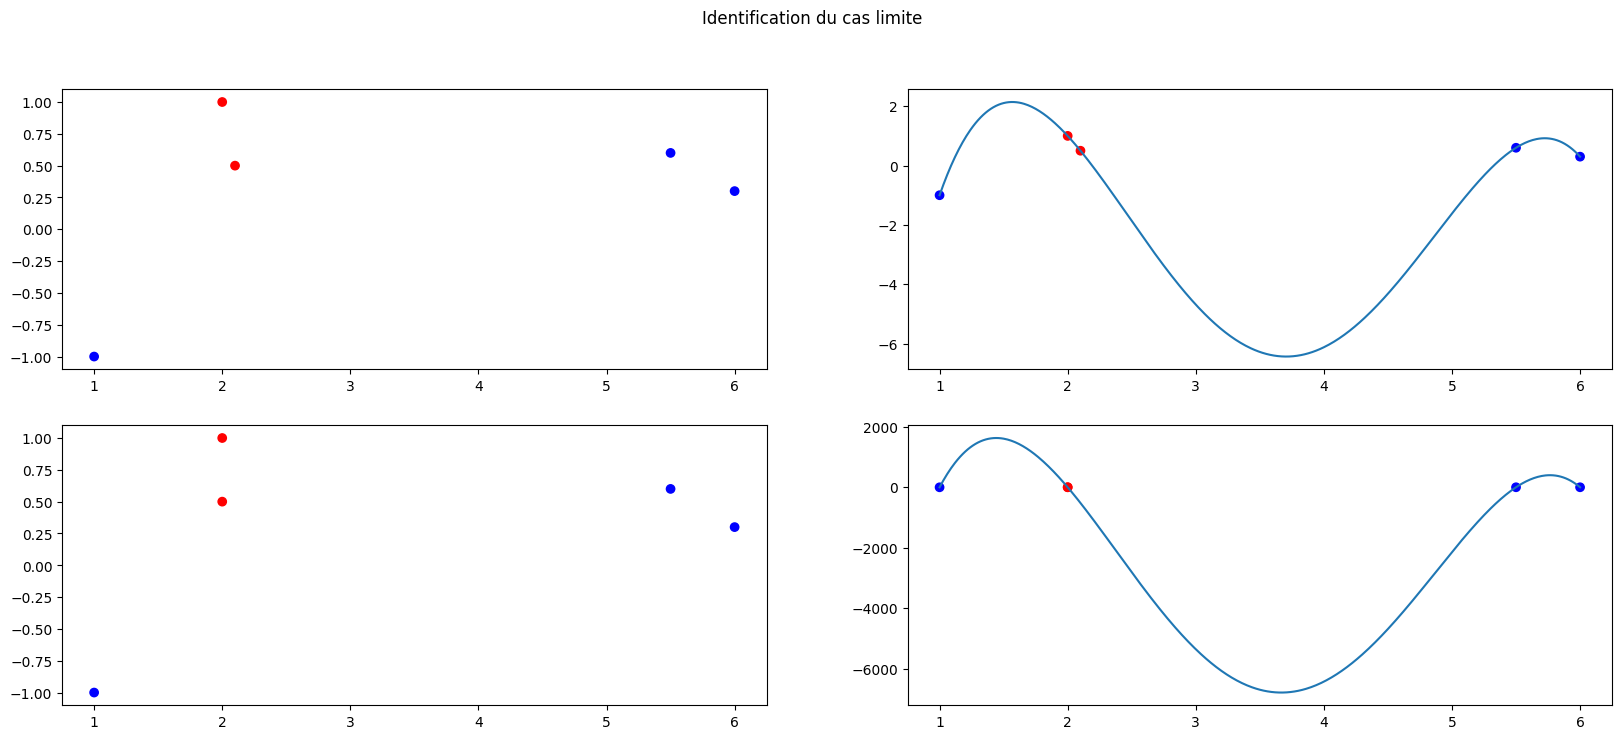

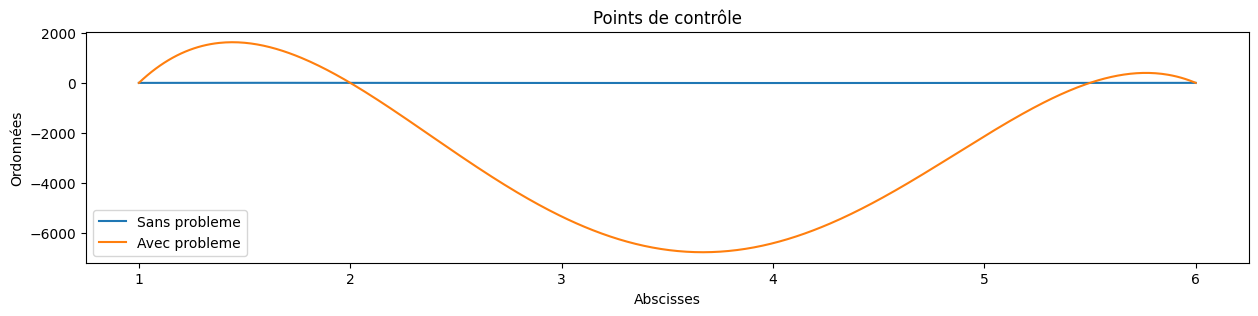

In [15]:
# Points de contrôle avec une BONNE configuration 
X1 = [1, 2, 2.1, 5.5, 6]; Y1 = [-1, 1, 0.5, 0.6, 0.3]
# Points de contrôle avec une MAUVAISE configuration 
X2 = [1, 2, 2.0001, 5.5, 6]; Y2 = Y1
colors = ['b', 'r', 'r', 'b', 'b']

### Affichage
configuration_problematique(X1, X2, Y1, Y2)

## Cas paramétrique (*(x,y) = f(t)*): Lagrange 

regulière(nb_elt=5, pas_tps=0.01) = ([0.0, 1.0, 2.0, 3.0, 4.0], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002

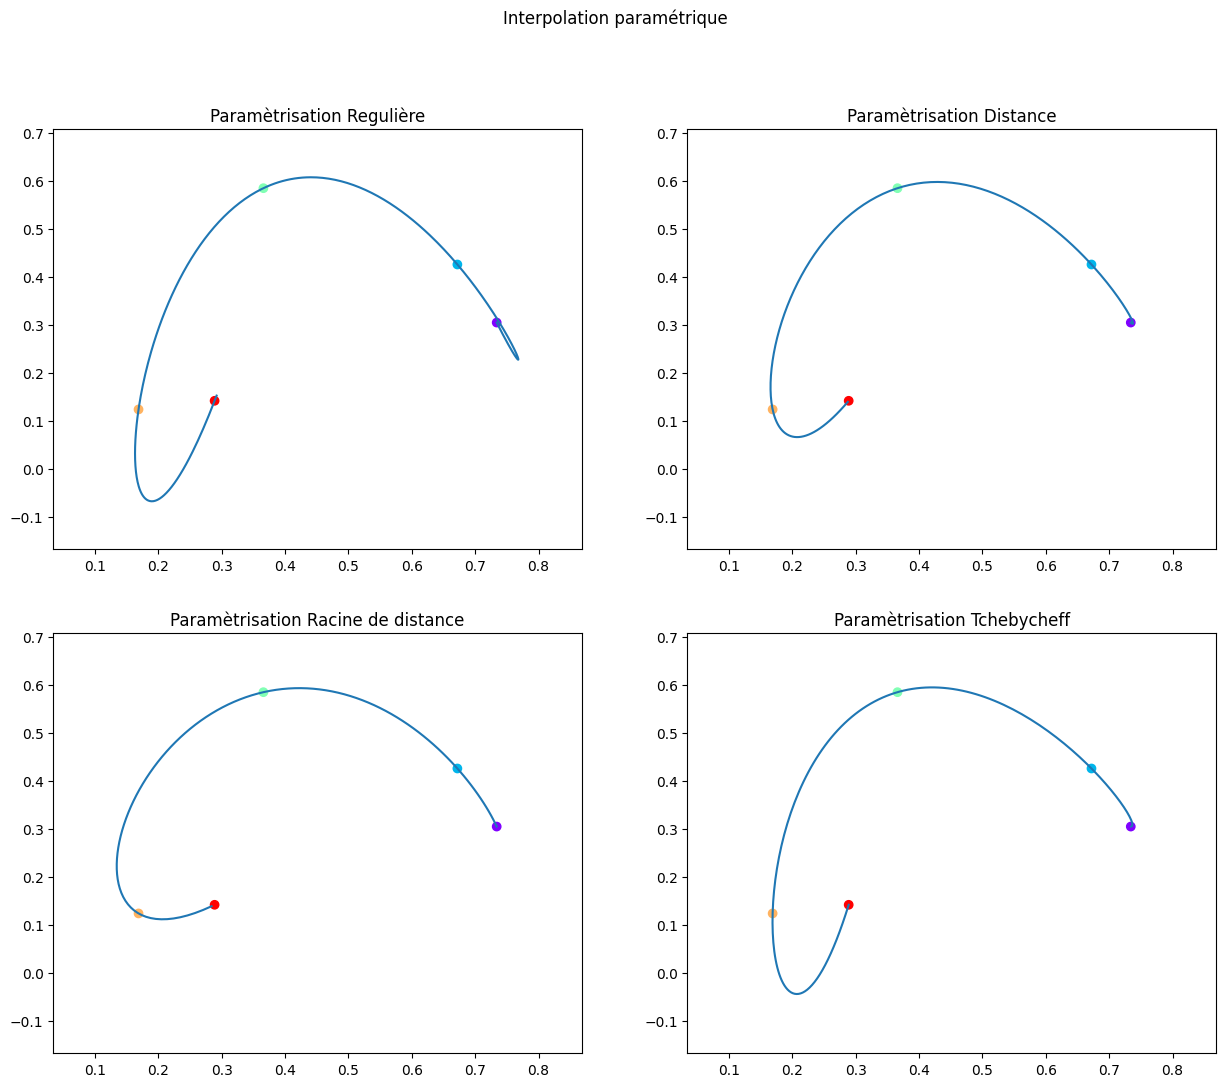

In [16]:
### Paramètrisation des temps
# Param Régulière
T_reg, list_t_reg = parametrisation_reguliere(nb_pts_controle, pas)
# Param Distance
T_dist, list_t_dist = parametrisation_distance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Racine Distance
T_racdist, list_t_racdist = parametrisation_racinedistance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Distance
T_Tche, list_t_Tche = parametrisation_Tchebychev(nb_pts_controle, pas)

### Comparaison
T = [T_reg, T_racdist, T_dist, T_Tche]
list_t = [list_t_reg, list_t_racdist, list_t_dist, list_t_Tche]

print(f"{T = }")
print(f"{list_t = }")

comparaison_paramétrisation('lagrange', T, list_t, X_pts_controles, Y_pts_controles, meme_intervalle = True)


## Cas paramétrique : Neville

regulière(nb_elt=5, pas_tps=0.01) = ([0.0, 1.0, 2.0, 3.0, 4.0], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002

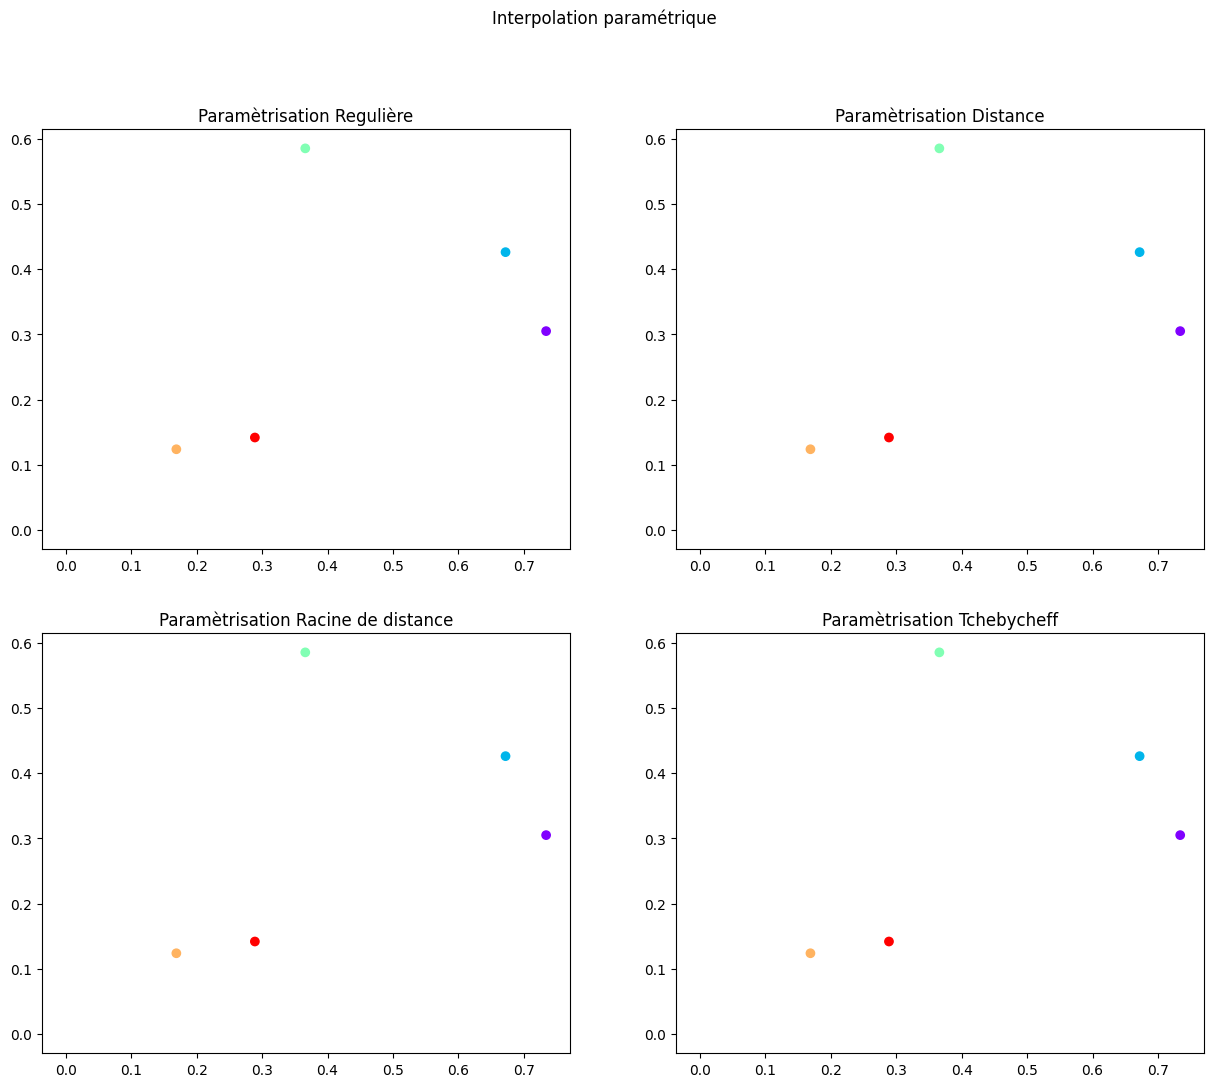

In [17]:
### Paramètrisation des temps
# Param Régulière
T_reg, list_t_reg = parametrisation_reguliere(nb_pts_controle, pas)
# Param Distance
T_dist, list_t_dist = parametrisation_distance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Racine Distance
T_racdist, list_t_racdist = parametrisation_racinedistance(nb_pts_controle, pas, X_pts_controles, Y_pts_controles)
# Param Distance
T_Tche, list_t_Tche = parametrisation_Tchebychev(nb_pts_controle, pas)

### Interpolation
labels_param = ['Regulière', 'Distance', 'Racine de distance', 'Tchebycheff']
T = [T_reg, T_dist, T_racdist, T_Tche]
list_t = [list_t_reg, list_t_dist, list_t_racdist, list_t_Tche]

comparaison_paramétrisation('neville', T, list_t, X_pts_controles, Y_pts_controles, meme_intervalle = False)


## Interpolation de Surface 

regulière(nb_elt=6, pas_tps=0.25) = ([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0])


AttributeError: 'int' object has no attribute 'shape'

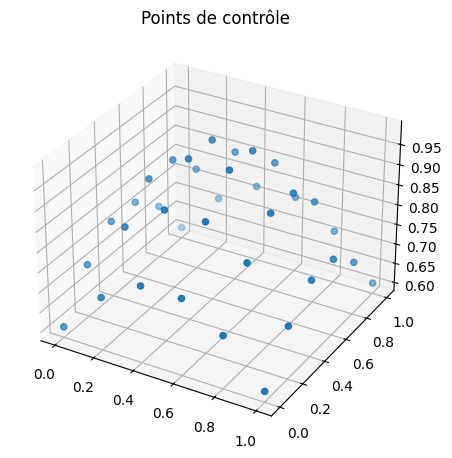

In [18]:
# Générer une grille de points de contrôle régulière
nb_point_grille = 6
X, Y = np.meshgrid(np.linspace(0, 1, nb_point_grille), np.linspace(0, 1, nb_point_grille))
Z = np.exp(-((X-0.5)**2  + (Y-0.5)**2))

# Paramétrisation 
pas_surface = 0.25
T, t_to_eval = parametrisation_reguliere(nb_point_grille, pas_surface)

# Interpoler la surface
interpolated_surface = interpolate_surface(X, Y, Z, T, t_to_eval, nb_point_grille)

# Visualisation
show_surface(X, Y, Z, interpolated_surface)
